# 肤色掩码

In [1]:
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt

In [16]:
src = cv2.cvtColor(cv2.imread('../datas/face.jpg'),cv2.COLOR_BGR2RGB)

In [22]:
def skintone(src):
    YCrCb = cv2.cvtColor(src,cv2.COLOR_RGB2YCrCb)
    Y =  np.ones((256,1),dtype=np.uint8)*0
    Y[5:] = 255
    Cr =  np.ones((256,1),dtype=np.uint8)*0
    Cr[140:180] = 255
    Cb =  np.ones((256,1),dtype=np.uint8)*0
    Cb[77:135] = 255
    dst = np.zeros_like(src)
    Y_img = YCrCb[:,:,0]
    Cr_img = YCrCb[:,:,1]
    Cb_img = YCrCb[:,:,2]
    dst[:,:,0] = cv2.LUT(Y_img,Y)
    dst[:,:,1] = cv2.LUT(Cr_img,Cr)
    dst[:,:,2] = cv2.LUT(Cb_img,Cb)
    
    mask = np.zeros_like(dst)
    _,mask[:,:,0] = cv2.threshold(dst[:,:,0],128,255,cv2.THRESH_BINARY_INV)
    _,mask[:,:,1] = cv2.threshold(dst[:,:,1],128,255,cv2.THRESH_BINARY_INV)
    _,mask[:,:,2] = cv2.threshold(dst[:,:,2],128,255,cv2.THRESH_BINARY_INV)
    mask = cv2.cvtColor(mask,cv2.COLOR_YCrCb2RGB)
    element = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    mask = cv2.dilate(mask,element)
    return mask

In [23]:
dst = skintone(src)

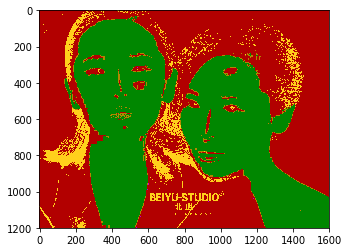

In [24]:
plt.imshow(dst)

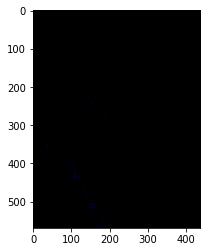

In [14]:
idx = (dst == 255)
skin = np.zeros_like(src)
skin[idx] = src[idx]
plt.imshow(skin)

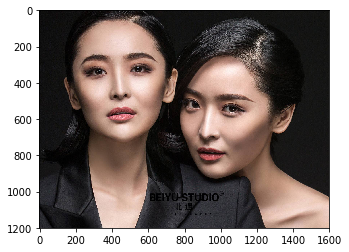

In [21]:
plt.imshow(src)